In [1]:
import json
import numpy as np
from PIL import Image
from os.path import join
from labels import disjoint_cityscapes_s1_train, disjoint_cityscapes_ALL_eval, disjoint_cityscapes_s2_train, disjoint_cityscapes_s3_train
import matplotlib.pyplot as plt

In [2]:
CS_ROOT_DIR = "/data/semantic_segmentation/Cityscapes" #PATH TO Cityscapes ROOT_DIR

In [3]:
label_dict = {
    "Cityscapes_Disjoint_S1": disjoint_cityscapes_s1_train,
    "Cityscapes_Disjoint_S2": disjoint_cityscapes_s2_train,
    "Cityscapes_Disjoint_S3": disjoint_cityscapes_s3_train
}

In [4]:
def create_label_map(labels, ignore_index=255):
    label_mapping = np.ones(256, np.int32) * ignore_index
    for label in labels:
        if label.id != -1:
            label_mapping[label.id] = label.trainId
    return label_mapping
    
def create_color_map(labels):
    color_map = np.zeros((256, 3), dtype=np.int32)
    for label in labels:
        if label.trainId != 255:
            color_map[label.trainId] = label.color
    return color_map

def load_item(item, root_dir):
    img_pth = join(root_dir, item["img"])
    label_pth = join(root_dir, item["label"])
    img = np.array(Image.open(img_pth))
    label = np.array(Image.open(label_pth))
    return img, label

In [5]:
color_map = create_color_map(disjoint_cityscapes_ALL_eval)

Cityscapes_Disjoint_S1


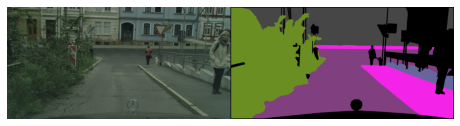

Cityscapes_Disjoint_S2


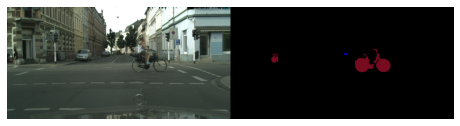

Cityscapes_Disjoint_S3


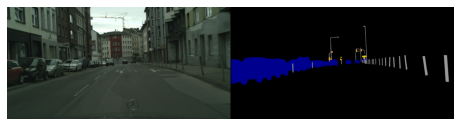

In [6]:
for split_name, labels in label_dict.items():
    print(split_name)
    
    label_mapping = create_label_map(labels)
    with open(f"{split_name}.json", "r") as f:
        data = json.load(f)
    item = data[15]
    img, label = load_item(item, CS_ROOT_DIR)
    
    label = label_mapping[label]
    label = color_map[label]
    image = np.hstack([img, label])
    plt.figure(figsize=(8, 6))
    plt.axis('off')
    plt.imshow(image)
    plt.show()
    